# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [3]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [4]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [5]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

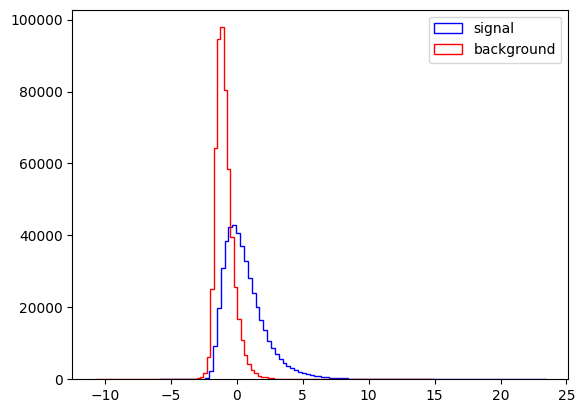

In [6]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

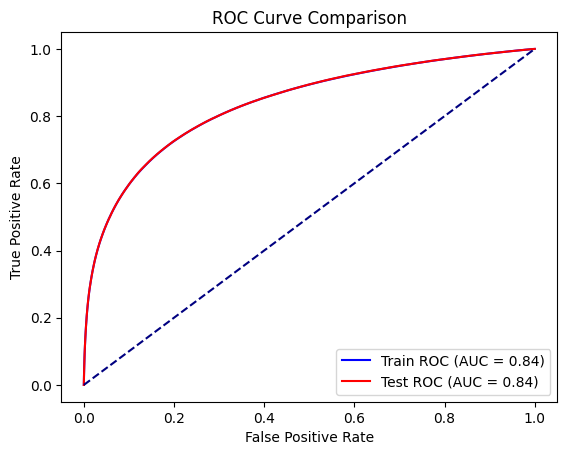

In [7]:
from sklearn.metrics import roc_curve, auc

# Get predictions for training and test samples
y_train_pred = Fisher.decision_function(X_Train)
y_test_pred = Fisher.decision_function(X_Test)

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_pred)

# Calculate AUC
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot both ROC curves
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', label='Test ROC (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

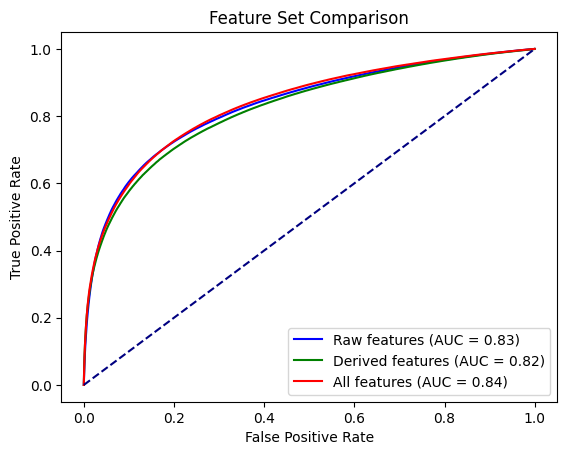

In [8]:
# Define different feature sets
raw_features = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
derived_features = ["MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
all_features = VarNames[1:]

# Train Fisher with different feature sets
Fisher_raw = DA.LinearDiscriminantAnalysis()
Fisher_raw.fit(X_Train[raw_features], y_Train)

Fisher_derived = DA.LinearDiscriminantAnalysis()
Fisher_derived.fit(X_Train[derived_features], y_Train)

Fisher_all = DA.LinearDiscriminantAnalysis()
Fisher_all.fit(X_Train[all_features], y_Train)

# Calculate ROC curves for each
fpr_raw, tpr_raw, _ = roc_curve(y_Test, Fisher_raw.decision_function(X_Test[raw_features]))
fpr_derived, tpr_derived, _ = roc_curve(y_Test, Fisher_derived.decision_function(X_Test[derived_features]))
fpr_all, tpr_all, _ = roc_curve(y_Test, Fisher_all.decision_function(X_Test[all_features]))

# Plot comparison
plt.figure()
plt.plot(fpr_raw, tpr_raw, color='blue', label='Raw features (AUC = %0.2f)' % auc(fpr_raw, tpr_raw))
plt.plot(fpr_derived, tpr_derived, color='green', label='Derived features (AUC = %0.2f)' % auc(fpr_derived, tpr_derived))
plt.plot(fpr_all, tpr_all, color='red', label='All features (AUC = %0.2f)' % auc(fpr_all, tpr_all))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Feature Set Comparison')
plt.legend(loc="lower right")
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

Let's choose:

Random Forest

Support Vector Machine (SVM)

Gradient Boosting

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 7.

#### Part b



Training Fisher...
Training Random Forest (fast)...
Training Linear SVM...
Training Gradient Boosting (fast)...
Training SGD Classifier...


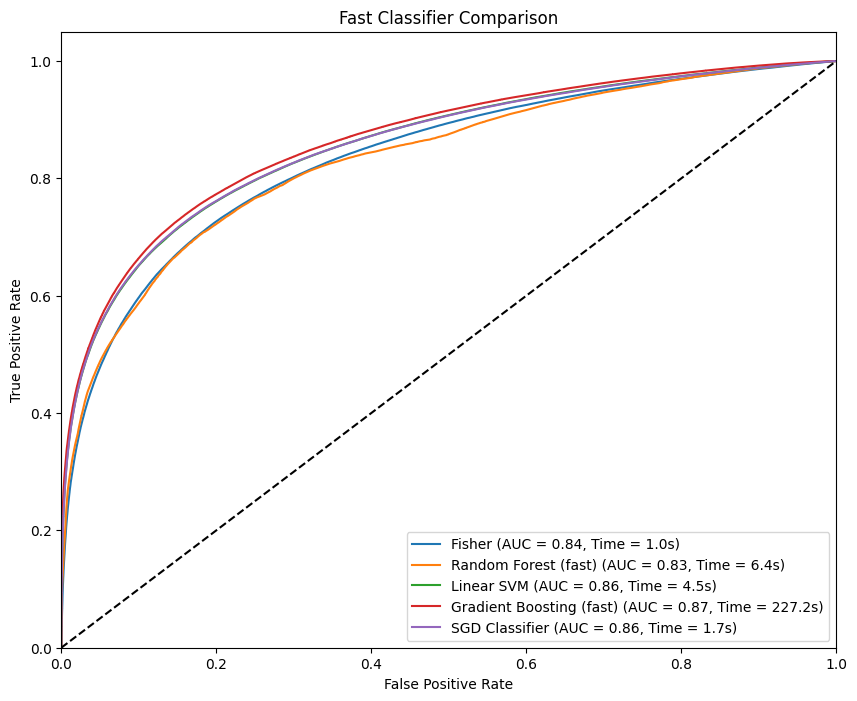

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC  # Faster than SVC with RBF kernel
from sklearn.linear_model import SGDClassifier  # Very fast linear classifier
from sklearn.metrics import roc_curve, auc
import time

def compare_classifiers_fast(X_train, y_train, X_test, y_test, sample_size=500000):
    """Optimized classifier comparison with subsampling and simpler models"""
    
    # Subsample the training data (randomly select sample_size events)
    if len(X_train) > sample_size:
        idx = np.random.choice(len(X_train), sample_size, replace=False)
        X_train_sub = X_train.iloc[idx]
        y_train_sub = y_train.iloc[idx]
    else:
        X_train_sub = X_train
        y_train_sub = y_train
    
    # Initialize classifiers with optimized parameters
    classifiers = {
        "Fisher": DA.LinearDiscriminantAnalysis(),
        "Random Forest": RandomForestClassifier(
            n_estimators=50,  
            max_depth=3,       
            n_jobs=-1,         
            random_state=42),
        "Linear SVM": LinearSVC(
            max_iter=1000,   
            random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(
            n_estimators=50,   
            learning_rate=0.2, 
            max_depth=2,      
            random_state=42),
        "SGD Classifier": SGDClassifier(
            loss='log_loss',   
            max_iter=1000,
            n_jobs=-1,
            random_state=42)
    }
    
    results = {}
    plt.figure(figsize=(10, 8))
    
    for name, clf in classifiers.items():
        start_time = time.time()
        print(f"Training {name}...")
        
        try:
            clf.fit(X_train_sub, y_train_sub)
            
            # Get scores (different methods for different classifiers)
            if hasattr(clf, "decision_function"):
                y_score = clf.decision_function(X_test)
            elif hasattr(clf, "predict_proba"):
                y_score = clf.predict_proba(X_test)[:, 1]
            else:
                y_score = clf.predict(X_test)
            
            # Calculate metrics
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
            
            results[name] = {
                'fpr': fpr,
                'tpr': tpr,
                'auc': roc_auc,
                'classifier': clf,
                'time': time.time() - start_time
            }
            
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}, Time = {results[name]["time"]:.1f}s)')
            
        except Exception as e:
            print(f"Failed to train {name}: {str(e)}")
    
    # Plot formatting
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Fast Classifier Comparison')
    plt.legend(loc="lower right")
    plt.show()
    
    return results

results = compare_classifiers_fast(X_Train, y_Train, X_Test, y_Test, sample_size=500000)

In [ ]:
# Assuming Gradient Boosting was the best (check your results)
best_clf =results["Gradient Boosting"]["classifier"]

# Get predicted probabilities
y_scores = best_clf.predict_proba(X_Test)[:, 1]

# Function to compute significance
def compute_max_significance(y_true, y_scores):
    from scipy.stats import norm
    
    thresholds = np.linspace(0, 1, 100)
    significances = []
    
    for threshold in thresholds:
        pred_pos = y_scores >= threshold
        true_pos = np.sum((pred_pos) & (y_true == 1))
        false_pos = np.sum((pred_pos) & (y_true == 0))
        
        if false_pos == 0:
            significance = 0
        else:
            significance = true_pos / np.sqrt(false_pos)
        
        significances.append(significance)
    
    max_sig = np.max(significances)
    best_threshold = thresholds[np.argmax(significances)]
    
    return max_sig, best_threshold

max_sig, best_threshold = compute_max_significance(y_Test, y_scores)
print(f"Maximal significance: {max_sig:.2f} at threshold {best_threshold:.2f}")

Maximal significance: 5344.82 at threshold 0.98


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

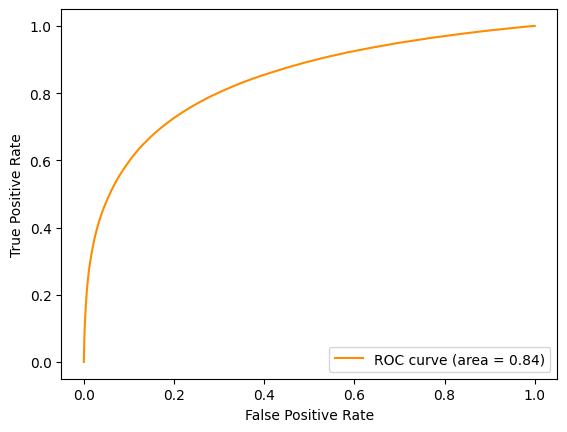

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [16]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix)

# Get predictions from best classifier
y_pred = best_clf.predict(X_Test)
y_prob = best_clf.predict_proba(X_Test)[:, 1]

# Calculate all metrics
accuracy = accuracy_score(y_Test, y_pred)
precision = precision_score(y_Test, y_pred)
recall = recall_score(y_Test, y_pred)
f1 = f1_score(y_Test, y_pred)
roc_auc = roc_auc_score(y_Test, y_prob)

# Confusion matrix for TPR/FPR
tn, fp, fn, tp = confusion_matrix(y_Test, y_pred).ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

# Create a table
metrics_table = [
    ["Metric", "Value"],
    ["Accuracy", f"{accuracy:.4f}"],
    ["Precision", f"{precision:.4f}"],
    ["Recall (TPR)", f"{recall:.4f}"],
    ["F1 Score", f"{f1:.4f}"],
    ["ROC AUC", f"{roc_auc:.4f}"],
    ["False Positive Rate", f"{fpr:.4f}"],
    ["Maximal Significance", f"{max_sig:.2f}"]
]

# Display the table
display(HTML(tabulate.tabulate(metrics_table, tablefmt='html')))

Metric,Value
Accuracy,0.7945
Precision,0.8134
Recall (TPR),0.7157
F1 Score,0.7615
ROC AUC,0.8660
False Positive Rate,0.1389
Maximal Significance,5344.82
